In [3]:
import pandas as pd
datos = pd.read_csv("/content/housingData.csv")

In [4]:
# Leer el archivo con el delimitador adecuado
datos = pd.read_csv('housingData.csv')

# Mostrar los primeros datos
print(datos.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [5]:
datos.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


array([[<Axes: title={'center': 'median_house_value'}>]], dtype=object)

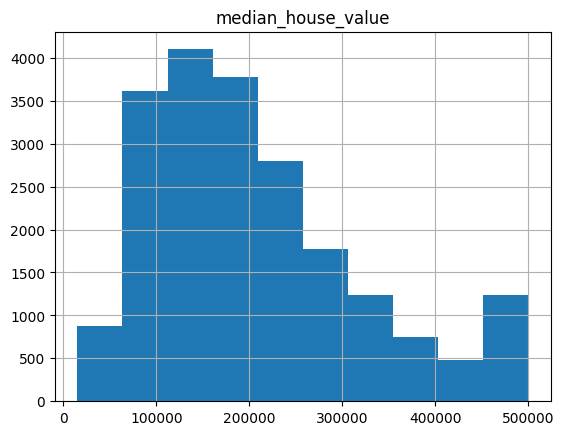

In [7]:
datos.hist("median_house_value")

array([[<Axes: title={'center': 'median_house_value'}>]], dtype=object)

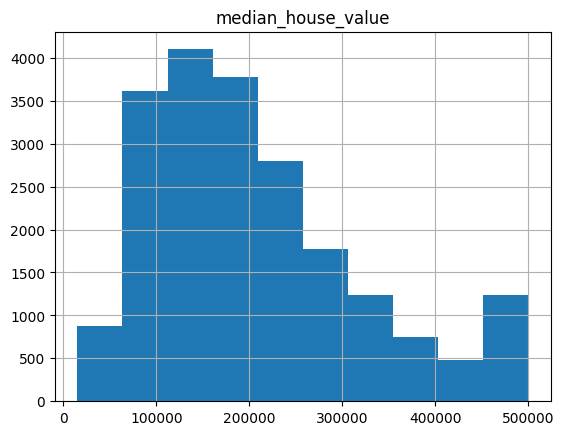

In [8]:
datos.hist("median_house_value")

<Axes: xlabel='latitude', ylabel='longitude'>

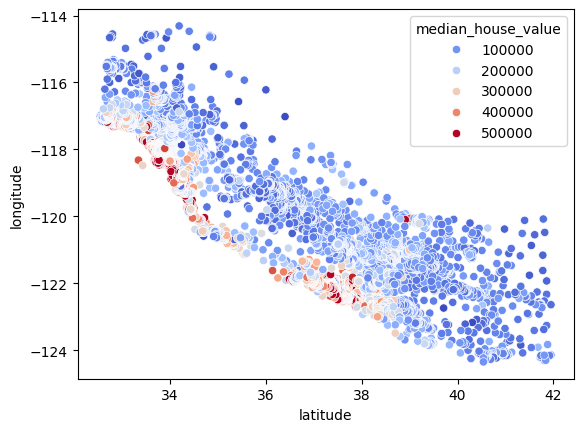

In [9]:
import seaborn as sb
sb.scatterplot(x="latitude", y="longitude", data=datos, hue="median_house_value", palette="coolwarm" )

<Axes: xlabel='latitude', ylabel='longitude'>

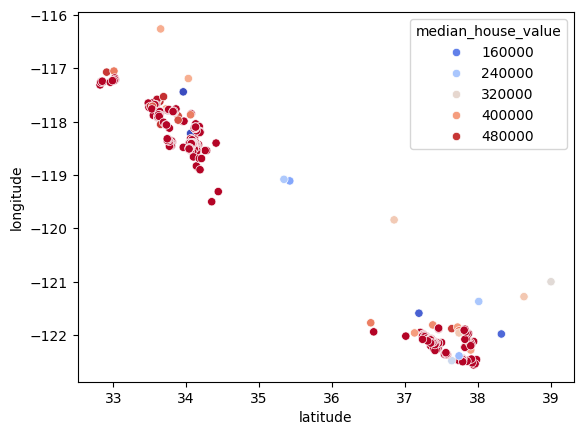

In [10]:
sb.scatterplot(x="latitude", y="longitude", data=datos[(datos.median_income > 10)], hue="median_house_value", palette="coolwarm")

In [11]:
datos.info()

# nuevos datos
datosN=datos.dropna()
datosN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64


In [12]:
print(datos['ocean_proximity'].unique())

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


In [13]:
print(datos['ocean_proximity'].head())


0    NEAR BAY
1    NEAR BAY
2    NEAR BAY
3    NEAR BAY
4    NEAR BAY
Name: ocean_proximity, dtype: object


In [14]:
datosN["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9034
INLAND,6496
NEAR OCEAN,2628
NEAR BAY,2270
ISLAND,5


In [15]:
#Dummies / One-Hot Encoding
dummies_ocean = pd.get_dummies(datosN["ocean_proximity"], dtype=int)
datosN = datosN.join(dummies_ocean)
datosN.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0


In [16]:
dummies_ocean

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [17]:
#Dummies / One-Hot Encoding
dummies_ocean = pd.get_dummies(datosN["ocean_proximity"], dtype=int)

In [18]:
dummies_ocean

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [20]:
#solo ejecutar una ves si se ejecuta dos veces sale error, SI TE APARECE ERROR SIGUE ADELANTE SIN PROBLEMA EJECUTANDO LOS OTROS SCRIPTS

datosN = datosN.join(dummies_ocean)

ValueError: columns overlap but no suffix specified: Index(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'], dtype='object')

In [21]:

datosN.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0


In [22]:
datosN.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0


In [23]:
datosN = datosN.drop("ocean_proximity", axis=1)
datosN.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


,median_house_value
median_house_value,1.000000
median_income,0.688355
<1H OCEAN,0.257614
NEAR BAY,0.160526
NEAR OCEAN,0.140378
total_rooms,0.133294
housing_median_age,0.106432
households,0.064894
total_bedrooms,0.049686
ISLAND,0.023525


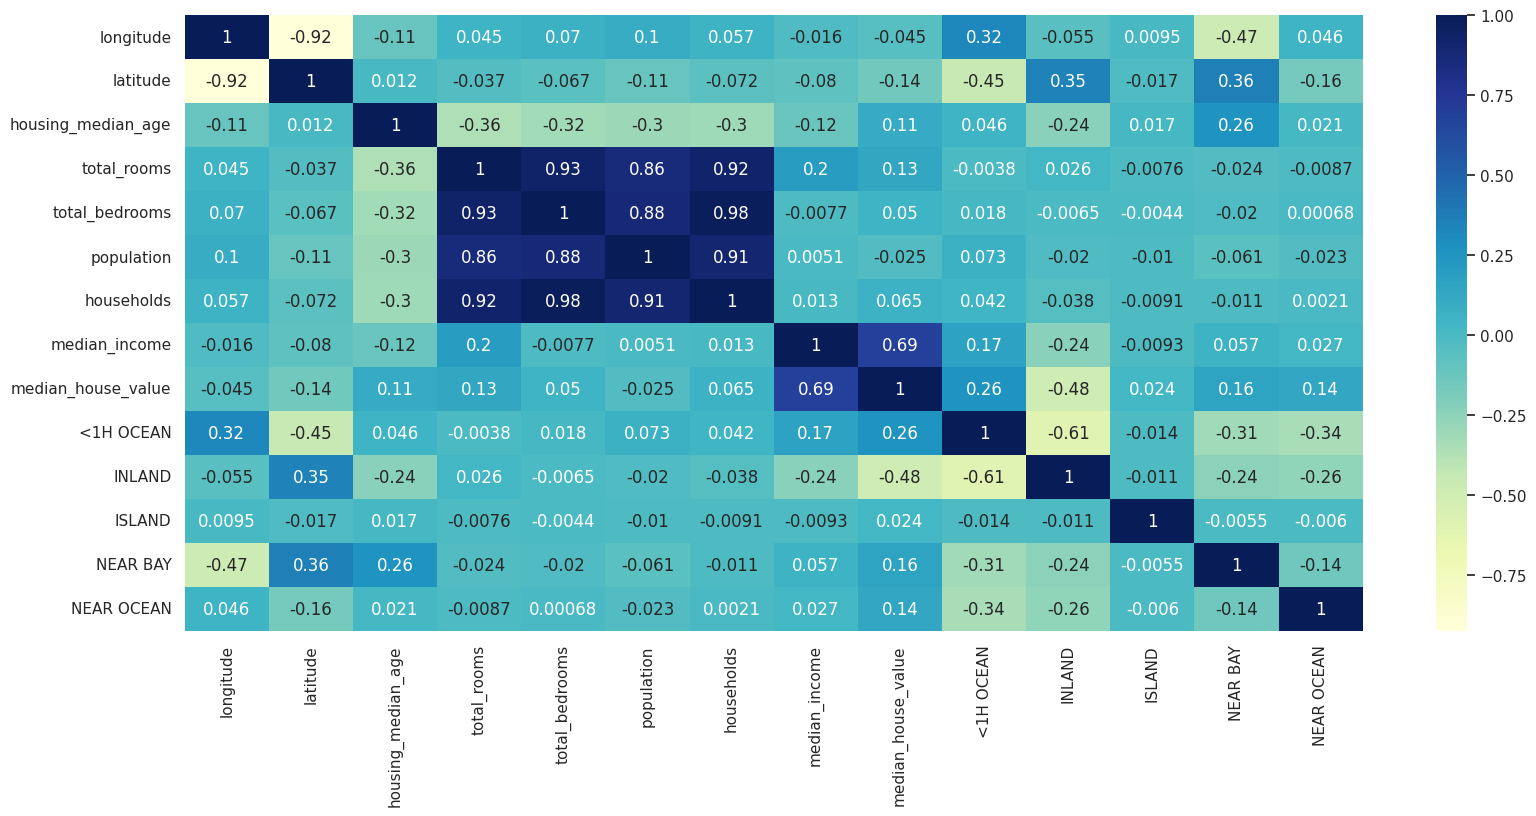

In [24]:
datosN.corr()
sb.set(rc={'figure.figsize': (19,8)})
sb.heatmap(datosN.corr(), annot=True, cmap="YlGnBu")
datosN.corr()["median_house_value"].sort_values(ascending=False)

In [25]:
x = datosN.drop("median_house_value", axis=1)
y = datosN["median_house_value"]



In [26]:
X = datosN.drop(["median_house_value"], axis=1)
Y = datosN["median_house_value"]

from sklearn.model_selection import train_test_split
X_entrena, X_prueba, Y_entrena, Y_prueba = train_test_split(X, Y, test_size=.2)

from sklearn.linear_model import LinearRegression

modelo=LinearRegression()
modelo.fit(X_entrena, Y_entrena)

prediccion = modelo.predict(X_prueba)
print(prediccion)

[172185.86759284 203452.92388889 257578.90159095 ...  66234.80628342
 209872.67638336 232587.57044519]


In [27]:
X_entrena.shape

(16346, 13)

In [28]:
prediccion = modelo.predict(X_prueba)
print(prediccion)

[172185.86759284 203452.92388889 257578.90159095 ...  66234.80628342
 209872.67638336 232587.57044519]


In [29]:
comparativa = {"Prediccion": prediccion, "Valor Real": Y_prueba}
pd.DataFrame(comparativa)

,Prediccion,Valor Real
13832,172185.867593,148400.0
17510,203452.923889,204200.0
4317,257578.901591,346700.0
2470,84039.190767,74600.0
20371,281024.056477,313800.0
...,...,...
10686,276688.171433,231400.0
5996,139768.713837,117800.0
16186,66234.806283,22500.0
5587,209872.676383,233300.0


In [30]:
#aplicamos el modelo de MSE MEDIUN SQUARE ERROR, ERROR CUADRATICO MEDIO
from sklearn.metrics import mean_squared_error
import numpy as np
rmse = np.sqrt(mean_squared_error(Y_prueba, prediccion))
print(rmse)

70265.74512994755


In [31]:
#Con esta funcion podemos evaluar el modelo con validación cruzada (métrica: error cuadratico)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(modelo, X, Y, cv=10, scoring='neg_mean_squared_error')
scores

array([-7.24502785e+09, -3.51492494e+09, -7.75863533e+09, -3.93664635e+09,
       -6.55869575e+09, -4.87535622e+09, -2.74473835e+09, -8.32708418e+09,
       -6.04058885e+09, -2.86360587e+09])

In [32]:
# Pasamos los valores a positivo
rmse_scores=np.sqrt(-scores)
rmse_scores

array([85117.72934312, 59286.80239565, 88083.11604239, 62742.69957837,
       80985.7749551 , 69823.75109584, 52390.25053211, 91252.8584722 ,
       77721.22520377, 53512.67015962])

In [33]:
def mostrar_scores(scores):
  print("Puntajes de MSE en cada fold:", scores)
  print("Promedio de MSE:", np.mean(scores))
  print("Desviación estándar de MSE:", np.std(scores))

In [34]:
mostrar_scores(rmse_scores)

Puntajes de MSE en cada fold: [85117.72934312 59286.80239565 88083.11604239 62742.69957837
 80985.7749551  69823.75109584 52390.25053211 91252.8584722
 77721.22520377 53512.67015962]
Promedio de MSE: 72091.68777781757
Desviación estándar de MSE: 13759.321238818411


**VAMOS A APLICAR UN NUEVO MODELO CON EL DATASET QUE TENEMOS EL MODELO AHORA ES ARBOL DE DESICION**

In [35]:
#Ahora vamos a entrenar un nuevo modelo con arboles de desicion
from sklearn.tree import DecisionTreeRegressor
modelDecisionTree = DecisionTreeRegressor(random_state=42)
modelDecisionTree.fit(X_entrena, Y_entrena)

DecisionTreeRegressor(random_state=42)

In [36]:
#Con esta funcion podemos evaluar el modelo con validación cruzada (métrica: error cuadratico)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(modelDecisionTree, X, Y, cv=10, scoring='neg_mean_squared_error')
scores

array([-1.93202185e+10, -5.49628487e+09, -1.13285119e+10, -5.80476223e+09,
       -7.18204918e+09, -6.88589657e+09, -4.51562567e+09, -1.20837905e+10,
       -1.03616807e+10, -5.56581780e+09])

In [37]:
# Pasamos los valores a positivo
rmse_scores=np.sqrt(-scores)
rmse_scores

array([138997.18866176,  74136.93321853, 106435.48211063,  76188.99019959,
        84746.97148977,  82981.30256267,  67198.40525445, 109926.29592532,
       101792.3412638 ,  74604.40874788])

In [38]:
def mostrar_scores_Tree(scoresTreeModel):
  print("Puntajes de MSE en cada fold:", scoresTreeModel)
  print("Promedio de MSE:", np.mean(scoresTreeModel))
  print("Desviación estándar de MSE:", np.std(scoresTreeModel))

In [39]:
#Por ultimo mostramos el puntaje del modelo
mostrar_scores_Tree(rmse_scores)

Puntajes de MSE en cada fold: [138997.18866176  74136.93321853 106435.48211063  76188.99019959
  84746.97148977  82981.30256267  67198.40525445 109926.29592532
 101792.3412638   74604.40874788]
Promedio de MSE: 91700.83194344032
Desviación estándar de MSE: 21105.004412133527


**VAMOS A APLICAR UN NUEVO MODELO CON EL DATASET QUE TENEMOS EL MODELO AHORA ES RAMDOM FOREST**

In [40]:
from sklearn.ensemble import RandomForestRegressor
modeloRandomF = RandomForestRegressor(n_estimators=100, random_state=42)
modeloRandomF.fit(X_entrena, Y_entrena)

RandomForestRegressor(random_state=42)

In [41]:
#Con esta funcion podemos evaluar el modelo con validación cruzada (métrica: error cuadratico)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(modeloRandomF, X, Y, cv=10, scoring='neg_mean_squared_error')
scores

array([-1.14443007e+10, -2.39251726e+09, -4.95251413e+09, -3.61981068e+09,
       -3.89158242e+09, -4.46391867e+09, -2.37197815e+09, -7.54996229e+09,
       -6.55524233e+09, -2.98781291e+09])

In [42]:
# Pasamos los valores a positivo
rmse_scores=np.sqrt(-scores)
rmse_scores

array([106978.03831001,  48913.36488785,  70374.10130739,  60164.86252583,
        62382.54900055,  66812.56370299,  48702.95831385,  86890.51896028,
        80964.45104981,  54660.89012302])

In [43]:
def mostrar_scores_forest(scoresForestModel):
  print("Puntajes de MSE en cada fold:", scoresForestModel)
  print("Promedio de MSE:", np.mean(scoresForestModel))
  print("Desviación estándar de MSE:", np.std(scoresForestModel))

In [44]:
#Por ultimo mostramos el puntaje del modelo
mostrar_scores_forest(rmse_scores)

Puntajes de MSE en cada fold: [106978.03831001  48913.36488785  70374.10130739  60164.86252583
  62382.54900055  66812.56370299  48702.95831385  86890.51896028
  80964.45104981  54660.89012302]
Promedio de MSE: 68684.42981815965
Desviación estándar de MSE: 17476.07087805363


VAMOS A EVALUAR CADA MODELO PERO DEBEMOS CAMBIAR LOS DATOS DE
list_mean = [72091, 91700, 68684]
list_sd = [13759, 21105, 17476]
POR LOS VALORES DE MEDIA Y DESVIACION ESTANDAR


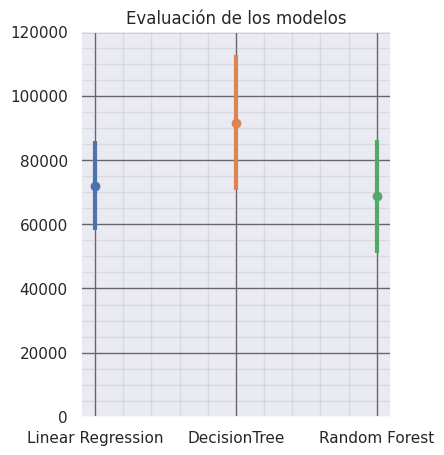

In [45]:
# Datos de evaluación
list_model = ['Linear Regression', 'DecisionTree', 'Random Forest']
list_mean = [72091, 91700, 68684]
list_sd = [13759, 21105, 17476]

# Agregamos una gráfica para comparar visualmente los resultados
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 5))
for i in range(3):
    plt.errorbar(i, list_mean[i], xerr=0, yerr=list_sd[i], fmt='o', linewidth=3)

plt.xticks([0, 1, 2], list_model)
plt.title("Evaluación de los modelos")
plt.ylim(0, 120000)
plt.grid(visible=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.show()

**VAMOS A HACER VALIDACION CRUZADA PARA AJUSTAR LOS DATOS**

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_entrena_escalado = scaler.fit_transform(X_entrena)
X_prueba_escalado = scaler.fit_transform(X_prueba)

pd.DataFrame(X_entrena_escalado)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.652521,-0.696410,-0.525685,-0.174274,0.237500,0.230349,0.161468,-0.627719,1.124552,-0.683419,-0.015645,-0.353200,-0.384674
1,-1.334771,1.011694,0.829678,-0.832627,-0.717622,-0.934665,-0.725472,-0.389373,-0.889243,-0.683419,-0.015645,2.831253,-0.384674
2,1.086929,-0.789749,1.148587,-0.935743,-0.901393,-1.021928,-0.973177,-1.425263,-0.889243,1.463231,-0.015645,-0.353200,-0.384674
3,-0.211302,1.506391,-1.322957,-0.560608,-0.654753,-0.929267,-0.949205,0.190544,-0.889243,1.463231,-0.015645,-0.353200,-0.384674
4,-0.171357,1.525059,-1.083775,0.556399,0.208484,-0.399388,-0.459124,0.636975,-0.889243,1.463231,-0.015645,-0.353200,-0.384674
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16341,1.056969,-0.747746,-2.040502,4.773870,4.294957,3.951195,3.352323,0.199981,-0.889243,1.463231,-0.015645,-0.353200,-0.384674
16342,0.028371,-0.575069,-0.685139,0.863413,0.631640,1.294605,0.704819,0.496846,1.124552,-0.683419,-0.015645,-0.353200,-0.384674
16343,0.832276,-0.705744,0.431042,-0.512549,-0.509671,-0.351708,-0.488422,-0.870072,1.124552,-0.683419,-0.015645,-0.353200,-0.384674
16344,0.562643,-0.687076,0.351315,0.215325,0.358402,-0.035940,0.419826,0.247640,1.124552,-0.683419,-0.015645,-0.353200,-0.384674


**NUEVAMENTE PROBAMOS LOS MODELOS**

In [93]:
# MODELO REGRESION LINEAL
from sklearn.linear_model import LinearRegression

modelo_lineal2 = LinearRegression()
modelo_lineal2.fit(X_entrena_escalado, Y_entrena)
scores = cross_val_score(modelo_lineal2, X_entrena_escalado, Y_entrena, cv=10, scoring='neg_mean_squared_error')
rmse_scores=np.sqrt(-scores)
mostrar_scores(rmse_scores)
modelo_lineal2.score(X_entrena_escalado, Y_entrena)

Puntajes de MSE en cada fold: [72044.18138291 70626.26299678 66135.71304244 65848.66489823
 68577.18647826 71448.90363706 64634.22061069 67733.79500878
 65825.9814197  71014.1585421 ]
Promedio de MSE: 68388.90680169425
Desviación estándar de MSE: 2593.8949282872527


0.6481796923908801

In [94]:
#MODELO ARBOLES DE DESICION
from sklearn.tree import DecisionTreeRegressor

modelo_arbol2 = DecisionTreeRegressor(random_state=42)
modelo_arbol2.fit(X_entrena_escalado, Y_entrena)
scores = cross_val_score(modelo_arbol2, X_entrena_escalado, Y_entrena, cv=10, scoring='neg_mean_squared_error')
rmse_scores=np.sqrt(-scores)
mostrar_scores_Tree(rmse_scores)
modelo_arbol2.score(X_entrena_escalado, Y_entrena)

Puntajes de MSE en cada fold: [68837.40986012 72895.91186514 68463.30681272 66241.14312583
 70486.72347226 69775.04265433 67652.4484719  68241.64969817
 65629.96670101 66461.86748373]
Promedio de MSE: 68468.5470145192
Desviación estándar de MSE: 2080.402415227305


1.0

In [95]:
#MODELO RAMDOM FOREST
from sklearn.ensemble import RandomForestRegressor

modelo_forest2 = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_forest2.fit(X_entrena_escalado, Y_entrena)
modelo_forest2.score(X_entrena_escalado, Y_entrena)
scores = cross_val_score(modelo_forest2, X_entrena_escalado, Y_entrena, cv=10, scoring='neg_mean_squared_error')
rmse_scores=np.sqrt(-scores)
mostrar_scores_forest(rmse_scores)
modelo_forest2.score(X_entrena_escalado, Y_entrena)

Puntajes de MSE en cada fold: [47120.13796557 50044.6243534  48208.05039685 47278.54538479
 50246.34581689 50171.64570941 46077.78461341 48784.57026733
 47465.46639855 49070.81969789]
Promedio de MSE: 48446.79906040855
Desviación estándar de MSE: 1379.3872473434562


0.9756853043242338

**VALIDAMOS EL RENDIMIENTO DE LOS MODELOS**

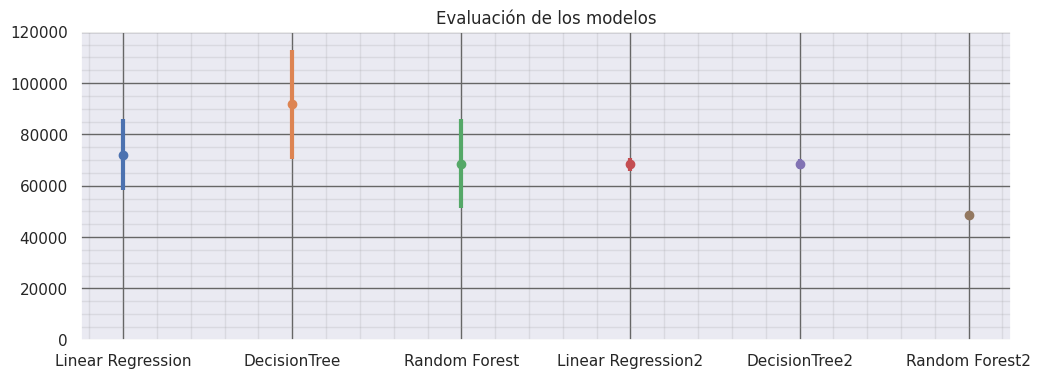

In [101]:
# Datos de evaluación
list_model = ['Linear Regression', 'DecisionTree', 'Random Forest', 'Linear Regression2', 'DecisionTree2', 'Random Forest2']
list_mean = [72091, 91700, 68684, 68388, 68468, 48446]
list_sd = [13759, 21105, 17476, 2593, 2080, 1379]

# Agregamos una gráfica para comparar visualmente los resultados
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
for i in range(6):
    plt.errorbar(i, list_mean[i], xerr=0, yerr=list_sd[i], fmt='o', linewidth=3)

plt.xticks([0, 1, 2, 3, 4 ,5], list_model)
plt.title("Evaluación de los modelos")
plt.ylim(0, 120000)
plt.grid(visible=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.show()

In [108]:
# Vamos a usar el modelo que mejor puntaje nos dio y aplicar un ajuste de datos RandomForest

#from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


#forest_reg = RandomForestRegressor()

# Definimos los posibles parámetros
n_estimators = [3, 10, 30, 50, 80, 100]
min_samples_split = [2, 4, 6, 8]
max_depth = [2, 4, 6, 8, 10]

params = {
    'n_estimators': n_estimators,
    'min_samples_split': min_samples_split,
    'max_depth': max_depth
}

#Aplicamos el método de ajuste

grid_search = GridSearchCV(estimator=modelo_forest2, param_grid=params, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_entrena_escalado, Y_entrena)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30, 50, 80, 100]},
             scoring='neg_mean_squared_error')

In [109]:
# Cuando se ejecute podemor ver los mejores parámetros encontrados
print("Mejores parámetros:", grid_search.best_params_)

Mejores parámetros: {'max_depth': 10, 'min_samples_split': 4, 'n_estimators': 100}
